In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('gps/anon_gps_tracks_with_dive.csv')

In [6]:
df.head()

,Unnamed: 0,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
0,1,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,t2012,2012-06-25 13:37:34,-2.172046,1,0.5,False,False,False,False,False,False
1,2,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,t2012,2012-06-25 13:39:14,-1.152306,1,0.6,False,False,False,False,False,False
2,3,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,t2012,2012-06-25 13:40:54,-2.172046,1,0.7,False,False,False,False,False,False
3,4,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,t2012,2012-06-25 13:42:34,-2.172046,1,0.8,False,False,False,False,False,False
4,5,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,t2012,2012-06-25 13:44:14,-2.172046,1,0.9,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263718 entries, 0 to 263717
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      263718 non-null  int64  
 1   lat             263718 non-null  float64
 2   lon             263718 non-null  float64
 3   alt             263718 non-null  float64
 4   unix            263718 non-null  int64  
 5   bird            263718 non-null  int64  
 6   species         263718 non-null  object 
 7   year            263718 non-null  object 
 8   date_time       263718 non-null  object 
 9   max_depth.m     263718 non-null  float64
 10  colony2         263718 non-null  int64  
 11  coverage_ratio  262648 non-null  float64
 12  is_dive         263718 non-null  bool   
 13  is_dive_1m      263718 non-null  bool   
 14  is_dive_2m      263718 non-null  bool   
 15  is_dive_4m      263718 non-null  bool   
 16  is_dive_5m      263718 non-null  bool   
 17  is_dive_0m

In [8]:
df.describe()

,Unnamed: 0,lat,lon,alt,unix,bird,max_depth.m,colony2,coverage_ratio
count,263718.000000,263718.000000,263718.000000,263718.000000,2.637180e+05,263718.000000,263718.000000,263718.000000,262648.000000
mean,131859.500000,56.580051,-4.234669,23.743436,1.359405e+09,53.508103,2.031185,4.063989,0.569349
std,76128.973483,2.476717,1.854708,249.990511,2.821933e+07,32.627900,13.735655,3.111499,0.349948
min,1.000000,51.468828,-6.749091,-482.654556,1.306926e+09,1.000000,-10.329966,1.000000,0.000000
25%,65930.250000,56.088568,-6.230647,-0.129882,1.339011e+09,25.000000,-1.407241,1.000000,0.200000
50%,131859.500000,56.255339,-5.301294,8.889465,1.368729e+09,49.000000,-0.581252,2.000000,0.800000
75%,197788.750000,58.691067,-2.664804,25.936559,1.372852e+09,83.000000,0.887174,6.000000,0.900000
max,263718.000000,59.824936,-1.042002,9839.139371,1.404837e+09,108.000000,250.468539,10.000000,1.100000


In [10]:
import numpy as np

In [ ]:
import ast
def date_to_age(bdate: str) -> int:
    date = bdate.split(".")
    if len(date) < 3:
        return None
    else:
        return 2020 - int(date[2])

def count_info(row: pd.Series) -> int:
    columns = ["activities", "interests", "music", "movies", "tv", "books", "about", "inspired_by", "religion"]
    return sum([ 1 if pd.isna(row[column]) else 0 for column in columns])

df.posts = df.posts.apply(lambda ps: np.array(ast.literal_eval(ps)))

df = df.assign( age = df.bdate.apply(date_to_age),
                posts_count = df.posts.apply(len),
                posts_len = df.posts.apply(lambda ps: int(np.median([len(p) for p in ps]) if len(ps) > 0 else 0)),
                info_count = df.apply(count_info, axis=1))
df = df[["age", "relation", "posts_count", "posts_len", "info_count"]]
df = df[df.age.notnull()]
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [14]:
import seaborn as sns

In [ ]:
print(np.unique(df.relation, return_counts=True))
sns.countplot(x='relation', data=df)

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
sns.pairplot(df, hue='relation')

In [ ]:
df1 = df.copy()

<AxesSubplot:xlabel='alt', ylabel='Count'>

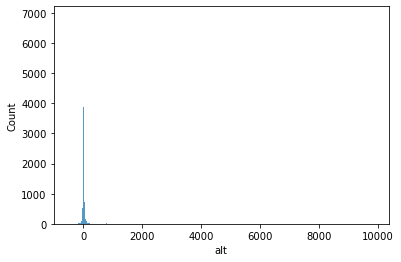

In [18]:
sns.histplot(df['alt'])

In [20]:
from scipy import stats
col = 'alt'
d = 0
print(stats.normaltest(df[col]))
print(stats.normaltest(df[col] - df[col].mean()))
print(stats.normaltest(df[col] - d))
print(stats.normaltest(np.log(df[col])))
print(stats.normaltest(np.log(df[col]) - np.log(d)))
print(stats.normaltest(np.log(df[col]) - np.log(df[col]).mean()))

NormaltestResult(statistic=713364.3210184698, pvalue=0.0)
NormaltestResult(statistic=713364.3210184698, pvalue=0.0)
NormaltestResult(statistic=713364.3210184698, pvalue=0.0)
NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=nan, pvalue=nan)
NormaltestResult(statistic=nan, pvalue=nan)


<ipython-input-20-07991ba9dade>:8: RuntimeWarning: divide by zero encountered in log
  print(stats.normaltest(np.log(df[col]) - np.log(d)))


In [ ]:
df = df1.copy()
df = df[df.relation != 0]
# df.posts_len = df.posts_len.apply(lambda l: np.log(l) if l != 0 else 0)

In [ ]:
sns.pairplot(df, hue='relation')

In [ ]:
X = df[['age', 'posts_count', 'posts_len', 'info_count']]
y = df['relation']

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC()

cross_val_score(svm_clf, X, y, cv=10).mean()